In [4]:
%matplotlib inline

In [5]:
import vugrad as vg
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
def experiment(net, epochs, criterion, optimizer, trainloader, testloader):
    acc_list = []
    loss_list = []
    epoch_list = []
    for epoch in range(epochs):  # loop over the dataset multiple times
        print('...validate...')
        epoch_list.append(epoch)
        #validate model during the training epochs
        acc = validate(net, testloader)
        print(acc)
        acc_list.append(acc)

        running_loss = 0.0
        print('...training epoch = ', epoch, '...')
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss_list.append(loss)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training')
    return acc_list, loss_list, epoch_list


def validate(net, testloader):
    total = 0
    correct = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network 
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

In [8]:
batch_size = 50
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
                                         
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [9]:
def exp_lr(trainloader, testloader):
    start_lr = 0.0005
    all_acc = []
    all_loss = []
    for i in range(6):
        learning_rate = (i+1) * start_lr
        net = Net()
        epochs = 20
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
        acc_list, loss_list, epoch_list = experiment(net, epochs, criterion, optimizer, trainloader, testloader)
        all_acc.append(acc_list)
        all_loss.append(loss_list)
    return all_acc, all_loss, epoch_list

In [10]:
all_acc, all_loss, epoch_list = exp_lr(trainloader, testloader)

...validate...
0.1
...training epoch =  0 ...
...validate...
0.1001
...training epoch =  1 ...
...validate...
0.1464
...training epoch =  2 ...
...validate...
0.2138
...training epoch =  3 ...
...validate...
0.3003
...training epoch =  4 ...
...validate...
0.3454
...training epoch =  5 ...
...validate...
0.3755
...training epoch =  6 ...
...validate...
0.4053
...training epoch =  7 ...
...validate...
0.421
...training epoch =  8 ...
...validate...
0.4395
...training epoch =  9 ...
...validate...
0.4625
...training epoch =  10 ...
...validate...
0.4694
...training epoch =  11 ...
...validate...
0.4837
...training epoch =  12 ...
...validate...
0.4911
...training epoch =  13 ...
...validate...
0.5004
...training epoch =  14 ...
...validate...
0.5082
...training epoch =  15 ...
...validate...
0.5236
...training epoch =  16 ...
...validate...
0.5251
...training epoch =  17 ...
...validate...
0.5322
...training epoch =  18 ...
...validate...
0.537
...training epoch =  19 ...
Finished Traini

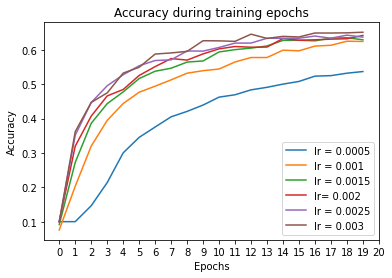

In [14]:
y1 = all_acc[0]
x1 = epoch_list
plt.plot(x1, y1, label = "lr = 0.0005" )
y2 = all_acc[1]
x2 = epoch_list
plt.plot(x2, y2, label = "lr = 0.001" )
y3 = all_acc[2]
x3 = epoch_list
plt.plot(x3, y3, label = "lr = 0.0015" )
y4 = all_acc[3]
x4 = epoch_list
plt.plot(x4, y4, label = "lr= 0.002" )
y5 = all_acc[4]
x5= epoch_list
plt.plot(x5, y5, label = "lr = 0.0025" )
y5 = all_acc[5]
x5= epoch_list
plt.plot(x5, y5, label = "lr = 0.003" )
# y5 = all_acc[5]
# x5= epoch_list
# plt.plot(x5, y5, label = "lr = 0.035" )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy during training epochs')
plt.xticks(np.arange(0, 21, 1))
plt.legend()
plt.savefig('figures/Q11-learningrates')
plt.show()

In [15]:
def max_acc(acc_list):
    max_value = max(acc_list)
    max_index = acc_list.index(max_value)
    return max_value, max_index
    

In [16]:
acc1, acc_index1 = max_acc(all_acc[0])
acc2, acc_index2 = max_acc(all_acc[1])
acc3, acc_index3 = max_acc(all_acc[2])
acc4, acc_index4 = max_acc(all_acc[3])
acc5, acc_index5 = max_acc(all_acc[4])
acc6, acc_index6 = max_acc(all_acc[5])
print("lr=0.0005",acc1, acc_index1)
print("lr=0.0010",acc2, acc_index2)
print("lr=0.0015",acc3, acc_index3)
print("lr=0.002",acc4, acc_index4)
print("lr=0.0025",acc5, acc_index5)
print("lr=0.003",acc6, acc_index6)

lr=0.0005 0.537 19
lr=0.0010 0.6252 18
lr=0.0015 0.6355 18
lr=0.002 0.6421 19
lr=0.0025 0.6429 18
lr=0.003 0.6514 19
